In [1]:
from PIL import Image

from fdray import (
    Background,
    Box,
    Camera,
    Color,
    ColorList,
    Include,
    LightSource,
    Pigment,
    Renderer,
    Scene,
)


In [2]:
def scene(*attrs) -> Scene:
    camera = Camera(30, 20, view_scale=2)
    return Scene(
        Include("colors.inc"),
        camera,
        LightSource(camera.location, "white"),
        Background("white", alpha=0.1),
        Box((-1, -1, -1), (1, 1, 1), *attrs),
    )


def render(*attrs) -> Image.Image:
    renderer = Renderer(width=300, height=300)
    array = renderer.render(scene(*attrs))
    return Image.fromarray(array)

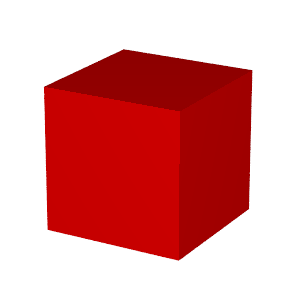

In [6]:
render(Color("Red"))

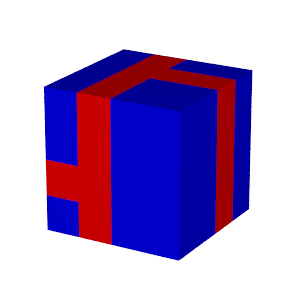

In [7]:
render(ColorList("brick", "red", "blue"))

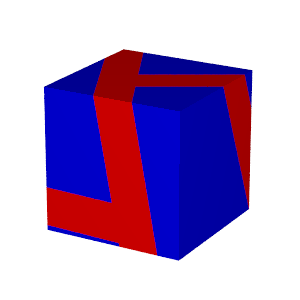

In [10]:
pigment = Pigment(ColorList("brick", "red", "blue")).rotate(10, 20, 30)
render(pigment)